In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = h5py.File("/storage/agrp/zivka/umami_Tau/UPP/umami-preprocessing/upp/output/pp_output_test.h5")

In [ ]:
f.close()

In [ ]:
flav = f['jets']['HadronConeExclTruthLabelID']

In [ ]:
np.unique(flav, return_counts=True) 

In [ ]:
np.unique(flav, return_counts=True) 

In [ ]:
tau_file = h5py.File('tau/output_tau.h5')
jet_file = h5py.File('jet/output_bkg.h5')

In [ ]:
tau_jets = tau_file['jets'][:200000]
jets = jet_file['jets'][:200000]

In [ ]:
tau_tracks = tau_file['tracks'][:200000]
tracks = jet_file['tracks'][:200000]

In [ ]:
jets[0].dtype

In [ ]:
pt = tracks['jetSeedPt'] / 1000
track_scores = [tracks['rnn_fakeScore'], tracks['rnn_chargedScore'], tracks['rnn_isolationScore'], tracks['rnn_conversionScore']]
track_valids = tracks['valid']
track_truth = tracks['NewTruthType']
prongs = np.sum(np.argmax(np.stack(track_scores,axis=-1), axis=-1)==1, axis=-1)

In [ ]:
arr = []
arr2 = []
for el in tau_tracks['jetSeedPt']:
    arr.append(np.sum(~np.isnan(el)))
for el in tracks['jetSeedPt']:
    arr2.append(np.sum(~np.isnan(el)))

In [ ]:
np.unique(np.concatenate(tau_tracks['tauTruthDecayMode']), return_counts=True)

In [ ]:
np.unique(np.concatenate(tracks['tauTruthDecayMode']), return_counts=True)

In [ ]:
f = h5py.File('umami/PFlow-hybrid-resampled.h5')

In [ ]:
tracks = f['tracks'][:]

In [ ]:
np.std(tracks['dz0_TV_PV0'][tracks['valid'].astype(int)])

In [ ]:
tracks['valid'].astype(bool)

In [ ]:
np.unique(tracks['dz0_TV_PV0'][tracks['valid'].astype(bool)], return_counts=True)

In [ ]:
np.std(np.array(tracks['numberOfSCTSharedHits'][~np.isnan(tracks['dz0_TV_PV0'])]))

In [ ]:
plt.hist(np.concatenate(tau_tracks['numberOfPixelHoles']), histtype='step', density=True)
plt.hist(np.concatenate(tracks['numberOfPixelHoles']), histtype='step', density=True)
plt.yscale('log')
plt.show()

In [ ]:
tau_pt = tau_tracks['jetSeedPt'][:500000, 0]
pt = tracks['jetSeedPt'][:500000, 0]

In [ ]:
eta = tau_tracks['jetSeedEta'][:, 0]

In [ ]:
plt.hist(tau_pt / 1000, range=(0, 1000), bins=100, density=True, histtype='step')
plt.hist(pt / 1000, range=(0, 1000), bins=100, density=True, histtype='step')
plt.yscale('log')
plt.show()

In [ ]:
np.random.rand(4, 10).shape[0]

In [ ]:
plt.hist(eta, bins=100)
plt.show()

In [3]:
from tqdm import tqdm

In [4]:
pt = {}
for i in tqdm(range(1, 9)):
    with h5py.File(f'/storage/agrp/zivka/TauGN1/tau_sampels/35M_sliced/output_JZ{i}.h5', 'r') as f:
        pt[i] = f['tracks']['jetSeedPt'][:, 0] / 1000

100%|██████████| 8/8 [4:11:57<00:00, 1889.66s/it]  


In [5]:
with h5py.File('/storage/agrp/zivka/TauGN1/tau_sampels/jet/test_35M_0.h5', 'r') as f:
    pt_combined = f['tracks']['jetSeedPt'][:, 0] / 1000

In [5]:
((pt_combined > 10) & (pt_combined < 150)).sum()

1474200

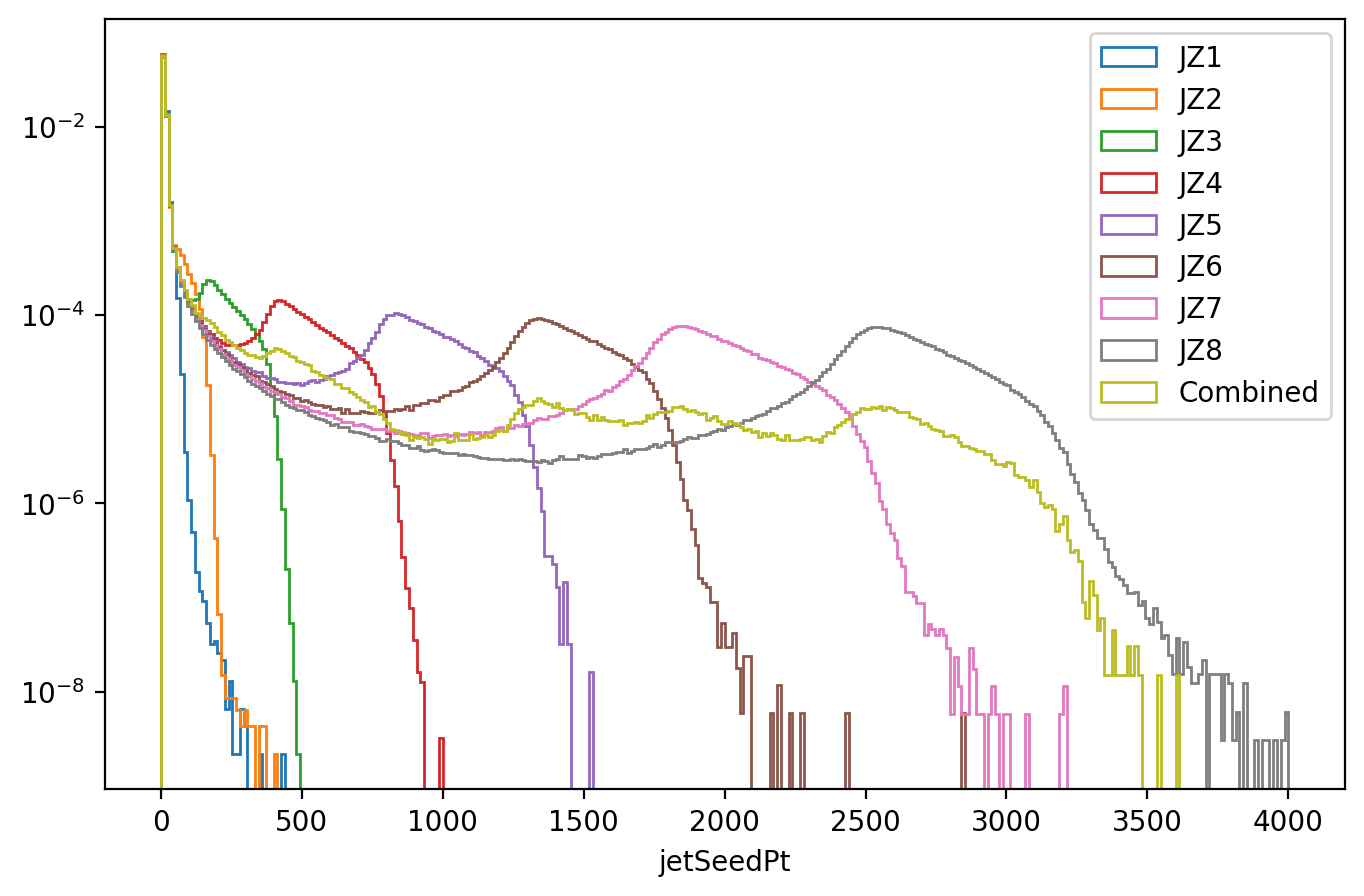

In [6]:
fig = plt.figure(figsize=(8, 5), dpi=200)
for val, el in pt.items():
    plt.hist(el[~np.isnan(el)], bins=300, density=True, histtype='step', label=f'JZ{val}', range=(0, 4000))
plt.hist(pt_combined[~np.isnan(pt_combined)], bins=300, density=True, histtype='step', label=f'Combined', range=(0, 4000))
plt.yscale('log')
plt.xlabel('jetSeedPt')
plt.legend()
plt.show()